In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

In [2]:
##Getting the Data
order_new = pd.read_csv("orders_new.csv")
data = pd.read_csv("data.csv")
order_products_new = pd.read_csv("order_products_new.csv")

In [3]:
order_new1 = order_new[['user_id','eval_set']]

In [4]:
order_new1.head()

,user_id,eval_set
0,3,Test
1,4,Test
2,6,Test
3,11,Test
4,12,Test


In [5]:
#To select rows whose column value is in list 
values = ['Test', 'Train']
order_new2= order_new1[order_new1.eval_set.isin(values)]
order_new2

,user_id,eval_set
0,3,Test
1,4,Test
2,6,Test
3,11,Test
4,12,Test
...,...,...
3421078,206199,Train
3421079,206200,Train
3421080,206203,Train
3421081,206205,Train


In [6]:
# join orders_new and order_product_new together
new_df = pd.merge(data, order_new2, on = 'user_id', how = 'left' )
new_df.shape

(13307953, 21)

In [11]:
new_df.head()

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,up_average_cart_position,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,eval_set
0,1,196,10,176.0,17.6,59,18,0.759259,10,1,...,1.400000,35791,0.582500,3.562750,0.572826,5.9,1.0,0,1.000000,Train
1,1,10258,10,176.0,17.6,59,18,0.759259,9,2,...,3.333333,1946,0.552962,2.960503,0.561151,5.9,0.9,0,1.000000,Train
2,1,10326,10,176.0,17.6,59,18,0.759259,1,5,...,5.000000,5526,0.521581,2.619345,0.563518,5.9,0.1,5,0.166667,Train
3,1,12427,10,176.0,17.6,59,18,0.759259,10,1,...,3.300000,6476,0.529482,3.181060,0.565473,5.9,1.0,0,1.000000,Train
4,1,13032,10,176.0,17.6,59,18,0.759259,3,2,...,6.333333,3751,0.479782,2.671073,0.572914,5.9,0.3,0,0.333333,Train


In [12]:
data.head()

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,up_last_order,up_average_cart_position,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order
0,1,196,10,176.0,17.6,59,18,0.759259,10,1,10,1.400000,35791,0.582500,3.562750,0.572826,5.9,1.0,0,1.000000
1,1,10258,10,176.0,17.6,59,18,0.759259,9,2,10,3.333333,1946,0.552962,2.960503,0.561151,5.9,0.9,0,1.000000
2,1,10326,10,176.0,17.6,59,18,0.759259,1,5,5,5.000000,5526,0.521581,2.619345,0.563518,5.9,0.1,5,0.166667
3,1,12427,10,176.0,17.6,59,18,0.759259,10,1,10,3.300000,6476,0.529482,3.181060,0.565473,5.9,1.0,0,1.000000
4,1,13032,10,176.0,17.6,59,18,0.759259,3,2,10,6.333333,3751,0.479782,2.671073,0.572914,5.9,0.3,0,0.333333


In [15]:
sample=new_df.sample(n=130000,  random_state=1)

In [16]:
sample.shape

(130000, 21)

In [7]:
#split the dataset into two train and test
df_train = new_df[new_df['eval_set']=='Train']
df_test = new_df[new_df['eval_set']=='Test']

In [8]:
df_train.head()

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,up_average_cart_position,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,eval_set
0,1,196,10,176.0,17.6,59,18,0.759259,10,1,...,1.400000,35791,0.582500,3.562750,0.572826,5.9,1.0,0,1.000000,Train
1,1,10258,10,176.0,17.6,59,18,0.759259,9,2,...,3.333333,1946,0.552962,2.960503,0.561151,5.9,0.9,0,1.000000,Train
2,1,10326,10,176.0,17.6,59,18,0.759259,1,5,...,5.000000,5526,0.521581,2.619345,0.563518,5.9,0.1,5,0.166667,Train
3,1,12427,10,176.0,17.6,59,18,0.759259,10,1,...,3.300000,6476,0.529482,3.181060,0.565473,5.9,1.0,0,1.000000,Train
4,1,13032,10,176.0,17.6,59,18,0.759259,3,2,...,6.333333,3751,0.479782,2.671073,0.572914,5.9,0.3,0,0.333333,Train


In [9]:
order_products_new.head()
order_products_new

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,0.0
1,2,28985,2,0.0
2,2,9327,3,0.0
3,2,45918,4,0.0
4,2,30035,5,0.0


In [ ]:
df_train_new = pd.merge(df_train, order_products_new, on = 'product_id', how = 'left' )
df_train_new.head()

In [10]:
order_new.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set
0,2774568,3,13,5,15,11.0,Test
1,329954,4,6,3,12,30.0,Test
2,1528013,6,4,3,16,22.0,Test
3,1376945,11,8,6,11,8.0,Test
4,1356845,12,6,1,20,30.0,Test


In [11]:
order_new_train = order_new[order_new['eval_set']=='Train']

In [12]:
order_new_train1 = pd.merge(order_new_train, order_products_new, on = 'order_id', how = 'left' )
order_new_train1

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set,product_id,add_to_cart_order,reordered
0,1187899,1,11,4,8,14.0,Train,196,1,1.0
1,1187899,1,11,4,8,14.0,Train,25133,2,1.0
2,1187899,1,11,4,8,14.0,Train,38928,3,1.0
3,1187899,1,11,4,8,14.0,Train,26405,4,1.0
4,1187899,1,11,4,8,14.0,Train,39657,5,1.0
...,...,...,...,...,...,...,...,...,...,...
1384612,272231,206209,14,6,14,30.0,Train,40603,4,1.0
1384613,272231,206209,14,6,14,30.0,Train,15655,5,1.0
1384614,272231,206209,14,6,14,30.0,Train,42606,6,1.0
1384615,272231,206209,14,6,14,30.0,Train,37966,7,1.0


In [13]:
order_new_train2 = pd.DataFrame({
    'user_id': order_new_train1['user_id'],
    'product_id': order_new_train1['product_id'],
    'reordered': order_new_train1['reordered']
})

In [14]:
df_train_new = pd.merge(df_train, order_new_train2, on=['user_id','product_id'],how='left')

In [15]:
df_train_new

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,eval_set,reordered
0,1,196,10,176.0,17.600000,59,18,0.759259,10,1,...,35791,0.582500,3.562750,0.572826,5.900000,1.000000,0,1.000000,Train,1.0
1,1,10258,10,176.0,17.600000,59,18,0.759259,9,2,...,1946,0.552962,2.960503,0.561151,5.900000,0.900000,0,1.000000,Train,1.0
2,1,10326,10,176.0,17.600000,59,18,0.759259,1,5,...,5526,0.521581,2.619345,0.563518,5.900000,0.100000,5,0.166667,Train,NaN
3,1,12427,10,176.0,17.600000,59,18,0.759259,10,1,...,6476,0.529482,3.181060,0.565473,5.900000,1.000000,0,1.000000,Train,NaN
4,1,13032,10,176.0,17.600000,59,18,0.759259,3,2,...,3751,0.479782,2.671073,0.572914,5.900000,0.300000,0,0.333333,Train,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474656,206209,43961,13,210.0,16.153846,129,68,0.715517,3,4,...,55371,0.514642,2.552628,0.573567,9.923077,0.230769,1,0.300000,Train,NaN
8474657,206209,44325,13,210.0,16.153846,129,68,0.715517,1,7,...,3485,0.289890,1.931960,0.558106,9.923077,0.076923,6,0.142857,Train,NaN
8474658,206209,48370,13,210.0,16.153846,129,68,0.715517,1,11,...,3934,0.592561,2.900254,0.571429,9.923077,0.076923,2,0.333333,Train,NaN
8474659,206209,48697,13,210.0,16.153846,129,68,0.715517,1,7,...,9783,0.260662,1.874443,0.561689,9.923077,0.076923,6,0.142857,Train,NaN


In [46]:

df_train_new.fillna(0, inplace=True)

X_test.fillna(0, inplace=True)

In [105]:
X_test=X_test.drop(['user_id','product_id'], axis = 1)

In [106]:
X_test

,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,up_last_order,up_average_cart_position,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order
120,12,133.0,11.083333,88,33,0.666667,1,2,2,3.000000,6371,0.279508,1.961005,0.576362,7.333333,0.083333,10,0.090909
121,12,133.0,11.083333,88,33,0.666667,1,10,10,5.000000,463,0.312741,2.057915,0.591793,7.333333,0.083333,2,0.333333
122,12,133.0,11.083333,88,33,0.666667,3,4,7,2.666667,2424,0.346872,2.131600,0.574670,7.333333,0.250000,5,0.333333
123,12,133.0,11.083333,88,33,0.666667,1,3,3,6.000000,12474,0.383731,2.281918,0.572310,7.333333,0.083333,9,0.100000
124,12,133.0,11.083333,88,33,0.666667,1,2,2,5.000000,27864,0.440836,2.402739,0.573500,7.333333,0.083333,10,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13307880,49,357.0,7.285714,677,198,0.760902,1,3,3,9.000000,19501,0.412092,2.219470,0.572996,13.816327,0.020408,46,0.021277
13307881,49,357.0,7.285714,677,198,0.760902,1,42,42,7.000000,802,0.294239,1.930041,0.563591,13.816327,0.020408,7,0.125000
13307882,49,357.0,7.285714,677,198,0.760902,1,6,6,11.000000,6292,0.486424,2.625863,0.561507,13.816327,0.020408,43,0.022727
13307883,49,357.0,7.285714,677,198,0.760902,1,27,27,7.000000,318,0.157088,1.708812,0.581761,13.816327,0.020408,22,0.043478


In [47]:
train_sam = df_train_new.sample(n=10000,  random_state=1)

In [86]:
train_sam

,user_id,product_id,user_orders,sum_days_since_prior_order,avg_days_since_prior_order,total_products,distinct_products,reordered_ratio,up_orders,up_first_order,...,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_average_basket,up_order_rate,up_orders_since_last_order,up_order_rate_since_first_order,eval_set,reordered
7839505,190548,31766,20,257.0,12.850000,232,124,0.779279,1,9,...,8483,0.500885,2.719292,0.572557,11.600000,0.050000,11,0.083333,Train,0.0
211790,5349,31126,5,49.0,9.800000,49,30,1.028571,1,3,...,712,0.390071,2.464539,0.580056,9.800000,0.200000,2,0.333333,Train,0.0
8269606,201184,7021,10,138.0,13.800000,139,55,0.404959,4,2,...,17629,0.334048,1.987621,0.574735,13.900000,0.400000,0,0.444444,Train,0.0
5350149,129829,4347,11,75.0,6.818182,267,148,0.448276,1,8,...,3637,0.438053,2.347661,0.586197,24.272727,0.090909,3,0.250000,Train,0.0
8392658,204183,19678,40,304.0,7.600000,285,113,0.539568,1,36,...,32534,0.471232,2.473693,0.570787,7.125000,0.025000,4,0.200000,Train,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691615,65612,46654,25,265.0,10.600000,400,131,0.748031,1,4,...,15703,0.454197,2.383272,0.575049,16.000000,0.040000,21,0.045455,Train,1.0
6351942,154502,25017,22,186.0,8.454545,171,66,0.462963,1,8,...,1326,0.458333,2.653509,0.568627,7.772727,0.045455,14,0.066667,Train,0.0
4437619,107600,32646,14,257.0,18.357143,202,92,0.854749,1,12,...,9,0.000000,1.888889,0.888889,14.428571,0.071429,2,0.333333,Train,0.0
3007175,72984,49683,9,77.0,8.555556,117,46,0.536364,5,4,...,97315,0.566696,2.858309,0.572913,13.000000,0.555556,0,0.833333,Train,1.0


In [87]:
df_im_input=train_sam.drop(['user_id','product_id','eval_set','reordered'], axis = 1)
df_im_output=train_sam['reordered']
X_test = df_test.drop(['eval_set'], axis = 1)

In [89]:
df_im_input.reset_index()
df_im_input.shape


(10000, 18)

In [90]:
df_im_output

7839505    0.0
211790     0.0
8269606    0.0
5350149    0.0
8392658    0.0
          ... 
2691615    1.0
6351942    0.0
4437619    0.0
3007175    1.0
4719491    0.0
Name: reordered, Length: 10000, dtype: float64

In [81]:

df_im_input.replace([np.inf, -np.inf],np.nan,inplace=True)
df_im_output.replace([np.inf, -np.inf],np.nan,inplace=True)

df_im_input.fillna(0, inplace=True)
df_im_output.fillna(0, inplace=True)

In [70]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=df_im_input,label=df_im_output)

In [71]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [72]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[16:48:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [97]:
def kfold_index(x_train, k):
    if k < 1:
        print('K cannot smaller than 1')
        return
    else:
        l = x_train.shape[0] 
        tail = l % k
        q = l // k
        index = [0]
        output_index = []
        # first n_examples % k sub_example have n_examples // k + 1 elements
        for i in range(1,tail):
            index.append((i*q)+1)
        for j in range(tail,k+1):
            index.append(j*q+tail)          
        for m in range(len(index)-1):
            output_index.append([index[m],index[m+1]])
        if [0, 0] in output_index:
             output_index.remove([0, 0])    
        return output_index

# the evaluation method here is auc,
# the return include mean of auc for all k eval_sets and the mean of best boosting round 

def cv_xgboost(x_train, y_train, param, num_boosting_round, early_stoping_rounds, kfold):
    
    import xgboost as xgb
    from sklearn import metrics
    # get kfold index
    index = kfold_index(x_train, kfold)

    #train each sub-combination
    auc = []
    br = []
    for i in range(kfold):
        #print(index)
        cv_xtest = x_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = y_train.iloc[index[i][0]:index[i][1],]
        
        # drop the test sub-set 
        cv_xtrain = x_train.drop(x_train.index[index[i][0]:index[i][1]])
        cv_ytrain = y_train.drop(y_train.index[index[i][0]:index[i][1]])
        
        # make the dmatrix for xgboost
        
        d_cvtrain = xgb.DMatrix(data = cv_xtrain, label = cv_ytrain)
        d_cvtest = xgb.DMatrix(data = cv_xtest, label = cv_ytest)
        
        # use xgb.train to train the model
        xg_l = xgb.train(params = param, 
                         dtrain = d_cvtrain, 
                         num_boost_round = num_boosting_round, 
                         early_stopping_rounds = early_stoping_rounds, 
                         evals = [(d_cvtest, 'test_evalset')],
                         verbose_eval = False)
        
        # calculate the auc as the evaluation metric
        fpr, tpr, threshold = roc_curve(cv_ytest, xg_l.predict(d_cvtest))
        aa = metrics.auc(fpr, tpr)
        auc.append(aa)  
        
        bb = xg_l.best_iteration
        br.append(bb)
        
    return np.mean(auc), np.mean(br)

In [59]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as rtree

In [98]:
param_grid = {
              'eta': [0.03, 0.1, 0.15],
              'subsample': [0.5,0.75,0.9],
              'max_depth': range(3, 5, 10),
              'colsample_bytree': [0.5, 0.75,0.95],
             }

In [99]:
s = sorted(param_grid)
combination = it.product(*(param_grid[Name] for Name in s))
print(s)

['colsample_bytree', 'eta', 'max_depth', 'subsample']


In [100]:
combination = list(combination)

In [102]:
for i in combination:

    param = {
             'eta': i[1],
             'colsample_bytree': i[0],
             'subsample': i[3],
             'eval_metric': 'auc',
             'max_depth': i[2],
            }
    
    score = 0
    scc, num_round = cv_xgboost(df_im_input, df_im_output, param, num_boosting_round=3000, early_stoping_rounds=30, kfold=10)

    if scc >= score:
        score = scc
        opt = i
        avg_num_round = num_round

print(score,opt,avg_num_round)

0.8100774016978933 (0.95, 0.15, 3, 0.9) 23.9


In [107]:
p_best = {
         'eta': 0.15,
         'colsample_bytree': 0.95,
         'subsample': 0.9,
         'eval_metric': 'auc',
         'max_depth': 3
         }

data_dmatrix = xgb.DMatrix(data=df_im_input,label=df_im_output)
Dtest= xgb.DMatrix(X_test)

xgb_t = xgb.train(params = p_best, dtrain = data_dmatrix, num_boost_round = 24)
pred_probs = xgb_t.predict(data_dmatrix)
y_pred_prob = xgb_t.predict(Dtest)

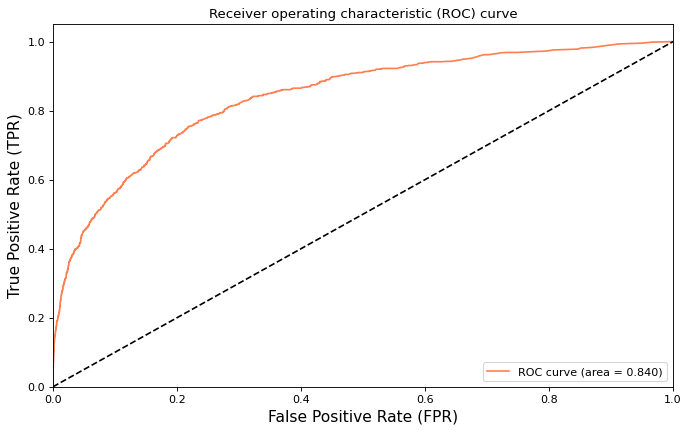

In [110]:
from sklearn.metrics import roc_curve, auc
#roc_curve() returns a list of false positive rates (FPR) and true positives rates (TPR) for different configurations of the classifier used to plot the ROC.
[fpr, tpr, thr] = roc_curve(df_im_output, pred_probs)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [122]:
from numpy import argmax
fpr, tpr, thr = roc_curve(df_im_output, pred_probs)
J = tpr - fpr
ix = argmax(J)
best_threshold = thr[ix]
print(best_threshold)

0.102596834


In [116]:
param_grid1 = {
              'eta': [0.03, 0.1, 0.15],
              'colsample_bytree':[0.2,0.4,0.6,0.8],
              'learning_rate':[0.01,0.05,0.1,0.2],
              'max_depth': [3,5,7,9]
             }
s1 = sorted(param_grid1)
combination1 = it.product(*(param_grid1[Name] for Name in s1))
print(s1)

['colsample_bytree', 'eta', 'learning_rate', 'max_depth']


In [112]:
combination1 = list(combination1)

In [117]:
for i in combination1:

    param = {
             'eta': i[1],
             'colsample_bytree': i[0],
             'learning_rate': i[2],
             'eval_metric': 'auc',
             'max_depth': i[3],
            }
    
    score = 0
    scc, num_round = cv_xgboost(df_im_input, df_im_output, param, num_boosting_round=1000, early_stoping_rounds=50, kfold=10)

    if scc >= score:
        score = scc
        opt = i
        avg_num_round = num_round

print(score,opt,avg_num_round)

0.7650972274914548 (0.8, 0.15, 0.2, 9) 5.8


In [118]:
y_pred_prob

array([0.0317999 , 0.05206412, 0.11038338, ..., 0.03456841, 0.02454929,
       0.03040805], dtype=float32)

In [123]:
test_reorder_lable = (y_pred_prob>=best_threshold).astype('int')
test_reorder_lable = pd.DataFrame({'Reorder_p': test_reorder_lable})
test_reorder_lable

,Reorder_p
0,0
1,0
2,1
3,0
4,0
...,...
4833287,0
4833288,0
4833289,0
4833290,0


In [127]:
pred_probs

array([0.03456841, 0.08508333, 0.33839872, ..., 0.04269085, 0.59949   ,
       0.09983628], dtype=float32)

In [135]:
train_reorder_lable = (pred_probs>=best_threshold).astype('int')
train_table = pd.DataFrame({'Train_lable':train_reorder_lable,'Reorder_p': pred_probs})
train_table

,Train_lable,Reorder_p
0,0,0.034568
1,0,0.085083
2,1,0.338399
3,0,0.060202
4,0,0.044283
...,...,...
9995,0,0.033009
9996,0,0.028086
9997,0,0.042691
9998,1,0.599490


/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

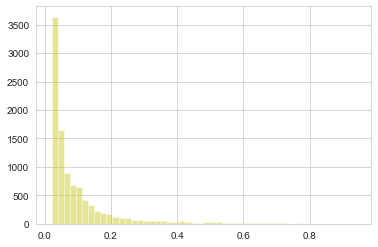

In [131]:
sns.distplot(pred_probs, color="y", kde=False, rug=False)

/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/jinhou/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jinhou/opt

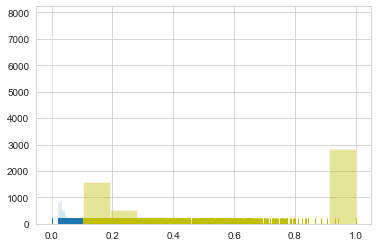

In [138]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

# Sort the dataframe by target
target_0 = train_table.loc[train_table['Train_lable'] == 0]
target_1 = train_table.loc[train_table['Train_lable'] == 1]


sns.distplot(target_0, kde=False, rug=True)
sns.distplot(target_1, color='y',kde=False, rug=True)

plt.show()